## <center> Playing with the data sets (Not graded)
 <center> Tuesday 02 March 2021

 <center> Frantzeska.Lavda@etu.unige.ch

In [12]:
import numpy as np
#from scipy.misc import imread
#from imageio import imread
from sklearn import datasets
from sklearn.utils import shuffle


## Iris data set. 

The iris data set contains descriptions of plants belonging to one of three categories of the iris plant : Iris-setosa, Iris-versicolor, Iris-virginica. The description of a plant is given by the four continuous attributes : sepal-length, sepal-width, petal-length, petal-width



In [13]:
def load_IRIS(test=True):
    iris = datasets.load_iris()
    X, y = shuffle(iris.data, iris.target, random_state= 400)
    if test:
        X_train = X[:100, :]
        y_train = y[:100]
        X_test = X[100:, :]
        y_test = y[100:]
        return X_train, y_train, X_test, y_test
    else:
        X = iris.data
        y = iris.target
        return X, y

In [14]:
# load the iris data set
x_iris, y_iris = load_IRIS(test=False)

# chech the shape of the data anf target
print('Data shape:', x_iris.shape)
print('Target shape:', y_iris.shape)

Data shape: (150, 4)
Target shape: (150,)


### For each continuous attribute f compute:
- the mean and the variance of each column, mean(f), var(f)
- the conditional mean and variance of each column, mean(f | target), var(f | target)

In [15]:
np.mean(x_iris,axis=0)
np.var(x_iris,axis=0)
target=5
#np.average(x_iris,weights=(x_iris>target))
np.mean(x_iris[x_iris[:,0]>target,:], axis=0)
np.var(x_iris[x_iris[:,0]>target,:], axis=0)


array([0.46920497, 0.19673442, 2.31688595, 0.44709853])

### Visualize the distributions of the continuous attributes using histograms

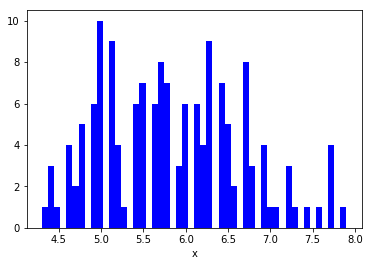

In [16]:
import matplotlib.pyplot as plt

kAttribute = 0

n, bins, patches = plt.hist(x_iris[:,kAttribute], 50, facecolor='blue')

plt.xlabel('x')

plt.show()


### Visualize the distributions of the continuous attributes conditioned on the type of the iris plant using histograms

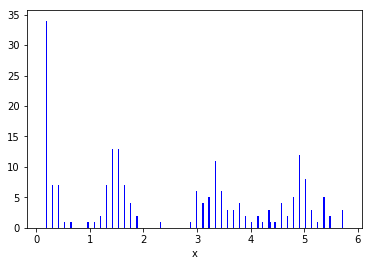

In [17]:
kType = 0

n, bins, patches = plt.hist(x_iris[y_iris==kType,:], 50, facecolor='blue')

plt.xlabel('x')

plt.show()

## Titanic data set
 This dataset provides information on the fate of
passengers on the fatal maiden voyage of the ocean liner ’Titanic’, summarized
according to economic status (class), sex, age and survival. The target attribute
is result ∈ {mort, surv} which indicates whether the passenger survived or not.

- Class    : crew = 0, first = 1, second = 2, third = 3
- Age      : adult = 0, child = 1
- Sex      : female = 0, male = 1
- Survived : no = 0, yes = 1.

In [60]:
import csv

# Loading the titanic data set and transform it into an array.
with open('titanic.csv', newline='') as csvfile: titanic = list(csv.reader(csvfile))
 
print('Name of each column:\n', np.array(titanic)[0, :], '\n')

# Delete the header containing the name of each feature
titanic = np.array(titanic)[1:, :]

# shuffle the data
np.random.shuffle(titanic)

# print 10 first lines of dataset
print('10 first lines of dataset:\n', titanic[0:10, :], '\n')



Name of each column:
 ['class' ' age' ' sex' ' result'] 

10 first lines of dataset:
 [['second' 'adu' 'm' 'mort']
 ['first' 'adu' 'm' 'mort']
 ['crew' 'adu' 'm' 'mort']
 ['third' 'adu' 'f' 'surv']
 ['crew' 'adu' 'm' 'mort']
 ['third' 'adu' 'm' 'mort']
 ['first' 'adu' 'f' 'surv']
 ['first' 'adu' 'f' 'surv']
 ['second' 'adu' 'm' 'mort']
 ['crew' 'adu' 'm' 'mort']] 



In [61]:
# split data and target
x_titanic = titanic[:,0:3]
y_titanic = titanic[:,3]

# shapes

print('Dataset shape:', titanic.shape)
print('x shape:', x_titanic.shape)
print('target shape:', y_titanic.shape)


Dataset shape: (2201, 4)
x shape: (2201, 3)
target shape: (2201,)


### For each discrete attribute f :
- find the levels of each attribute/ column 
- compute the number of data of each level

hint: use np.unique

In [74]:
y_titanic = y_titanic.reshape(y_titanic.shape[0],1)

for i in range(3):
    print('Levels of column', i+1,':',np.unique(x_titanic[:,i])[:])
    print('Number of data:', np.unique(x_titanic[:,i],return_counts=True)[1][:])
    
print('Levels of column', 4,':',np.unique(y_titanic[:,0])[:])
print('Number of data:', np.unique(y_titanic[:,0],return_counts=True)[1][:])


Levels of column 1 : ['crew' 'first' 'second' 'third']
Number of data: [873 332 281 715]
Levels of column 2 : ['adu' 'enf']
Number of data: [2082  119]
Levels of column 3 : ['f' 'm']
Number of data: [ 452 1749]
Levels of column 4 : ['mort' 'surv']
Number of data: [1490  711]
